# Decision Tree Model for the Pokemon Type Predictor

# Import library

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve

# Import tabular Dataset

In [109]:
datapath = "Tabular Dataset.csv"
df = pd.read_csv(datapath)   
df.head(5)

,National\nDex,Pokemon\nName,HP,Attack,Defense,Special\nAttack,Special\nDefense,Speed,Total,Ability I,Ability II,Hidden Ability,Weight (kg),Height (m),Pokedex Color,Egg Group I,Egg Group II,Type I,Type II
0,1.0,Bulbasaur,45,49,49,65,65,45,318,Overgrow,NaN,Chlorophyll,6.9,0.7,Green,Monster,Grass,Grass,Poison
1,2.0,Ivysaur,60,62,63,80,80,60,405,Overgrow,NaN,Chlorophyll,13.0,1.0,Green,Monster,Grass,Grass,Poison
2,3.0,Venusaur,80,82,83,100,100,80,525,Overgrow,NaN,Chlorophyll,100.0,2.0,Green,Monster,Grass,Grass,Poison
3,3.1,Venusaur (Mega),80,100,123,122,120,80,625,Thick Fat,NaN,NaN,155.5,2.4,Green,Monster,Grass,Grass,Poison
4,4.0,Charmander,39,52,43,60,50,65,309,Blaze,NaN,Solar Power,8.5,0.6,Red,Monster,Dragon,Fire,NaN


# Define the size of the parameter

In [110]:
# Define parameters
test_size = 0.1
random_state = 2048
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],  
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],  
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],  
    'criterion': ['gini', 'entropy']
}

# Create X and Y variable to store the feature matrix

In [111]:
# Replace NaN values in 'Type II' with the values from 'Type I'
df['Type II'].fillna(df['Type I'], inplace=True)

# Check if columns exist before applying one-hot encoding
columns_to_encode = ['Ability I', 'Ability II', 'Hidden Ability', 'Egg Group I', 'Egg Group II', 'Pokedex Color']
existing_columns_to_encode = [col for col in columns_to_encode if col in df.columns]

# Convert existing columns to numerical features using one-hot encoding
df = pd.get_dummies(df, columns=existing_columns_to_encode)

# Split dataset into features and target variable
feature_cols_X = ['HP', 'Attack', 'Defense', 'Special\nAttack', 'Special\nDefense', 
                  'Speed', 'Total', 'Weight (kg)', 'Height (m)'] + [col for col in df.columns if col.startswith('Ability I_') 
                                                                    or col.startswith('Ability II_') or col.startswith('Hidden Ability_')
                                                                    or col.startswith('Egg Group I_') or col.startswith('Egg Group II_')
                                                                    or col.startswith('Pokedex Color_')]
target_col_y = ['Type I', 'Type II']
X = df[feature_cols_X]  # Features
y1 = df['Type I']  # Target variable 1
y2 = df['Type II']  # Target variable 2

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=test_size, random_state=random_state)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=test_size, random_state=random_state)



C:\Users\cicic\AppData\Local\Temp\ipykernel_4880\711775059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type II'].fillna(df['Type I'], inplace=True)


# Decision Tree Model   

In [112]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model for Type I
grid_search.fit(X_train, y1_train)
best_clf1 = grid_search.best_estimator_

# Train the model for Type II
grid_search.fit(X_train, y2_train)
best_clf2 = grid_search.best_estimator_

# Make predictions
y1_pred = best_clf1.predict(X_test)
y2_pred = best_clf2.predict(X_test)

# Make predictions on the training set
y1_train_pred = best_clf1.predict(X_train)
y2_train_pred = best_clf2.predict(X_train)



Fitting 5 folds for each of 3146 candidates, totalling 15730 fits
Fitting 5 folds for each of 3146 candidates, totalling 15730 fits


# Evaluate the Models

In [113]:
# Evaluate the models
accuracy1 = accuracy_score(y1_test, y1_pred)
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Best Parameters for Type I:", grid_search.best_params_)
print("Best Parameters for Type II:", grid_search.best_params_)
print("Accuracy for Type I:", accuracy1)
print("Accuracy for Type II:", accuracy2)
print("Classification Report for Type I:\n", classification_report(y1_test, y1_pred))
print("Classification Report for Type II:\n", classification_report(y2_test, y2_pred))

Best Parameters for Type I: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters for Type II: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Type I: 0.5806451612903226
Accuracy for Type II: 0.45161290322580644
Classification Report for Type I:
               precision    recall  f1-score   support

         Bug       0.93      0.87      0.90        15
        Dark       0.00      0.00      0.00         5
      Dragon       0.33      0.50      0.40         4
    Electric       0.71      0.83      0.77         6
       Fairy       0.67      0.50      0.57         4
    Fighting       0.00      0.00      0.00         5
        Fire       0.71      0.83      0.77         6
      Flying       0.00      0.00      0.00         1
       Ghost       0.50      0.33      0.40         3
       Grass       0.75      0.43      0.55         7
      Ground       0.58      0.70      0.64        10
     

C:\Users\cicic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cicic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cicic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

# Visualise the resut

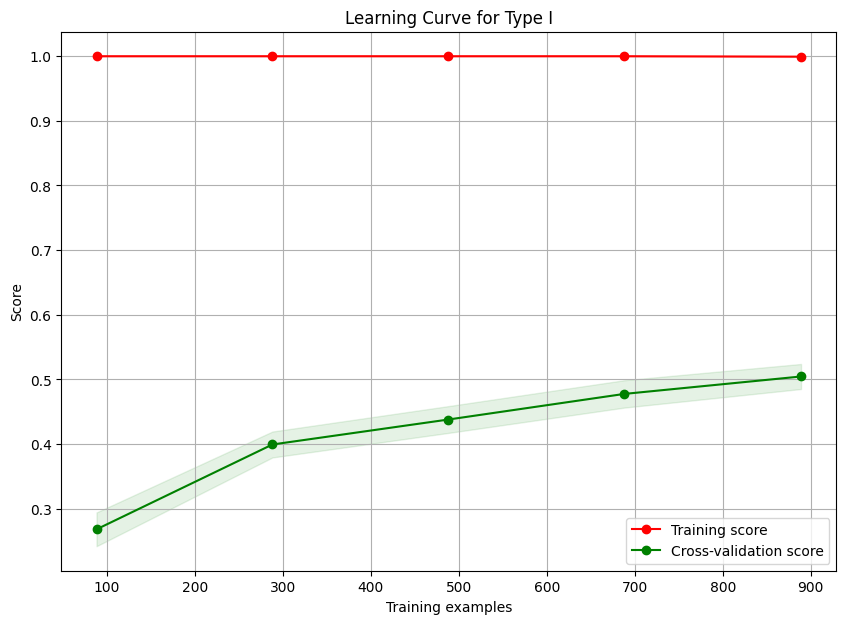

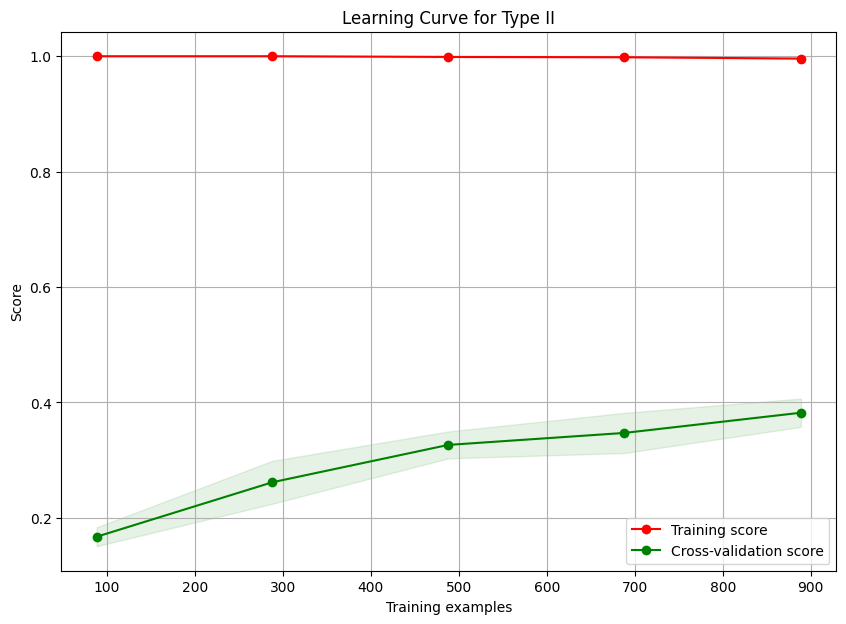

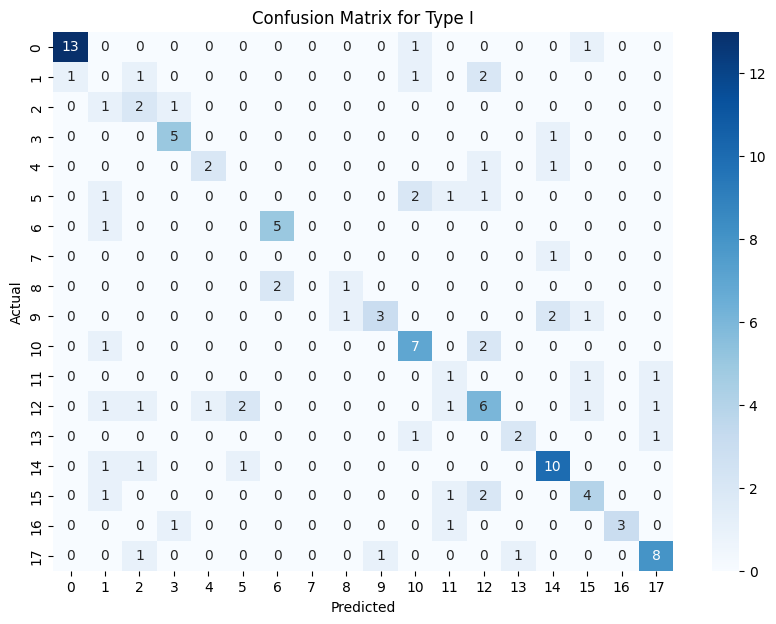

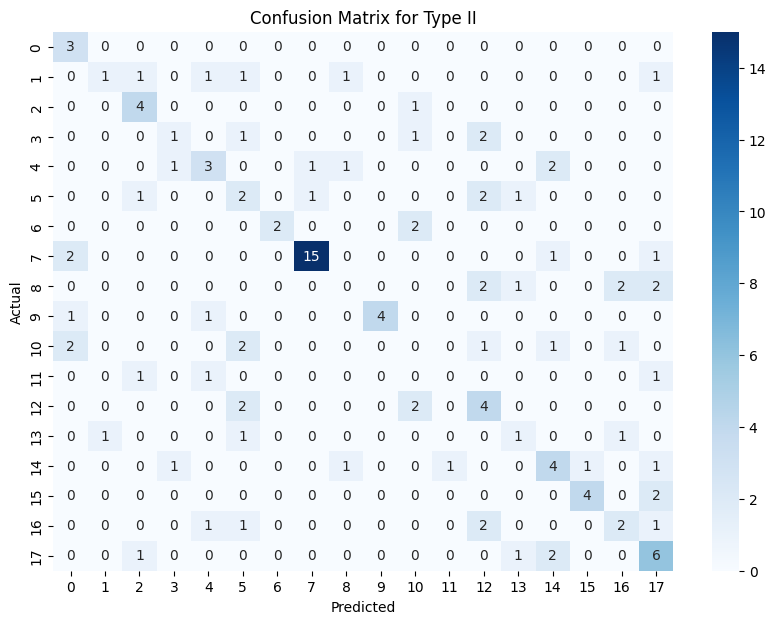

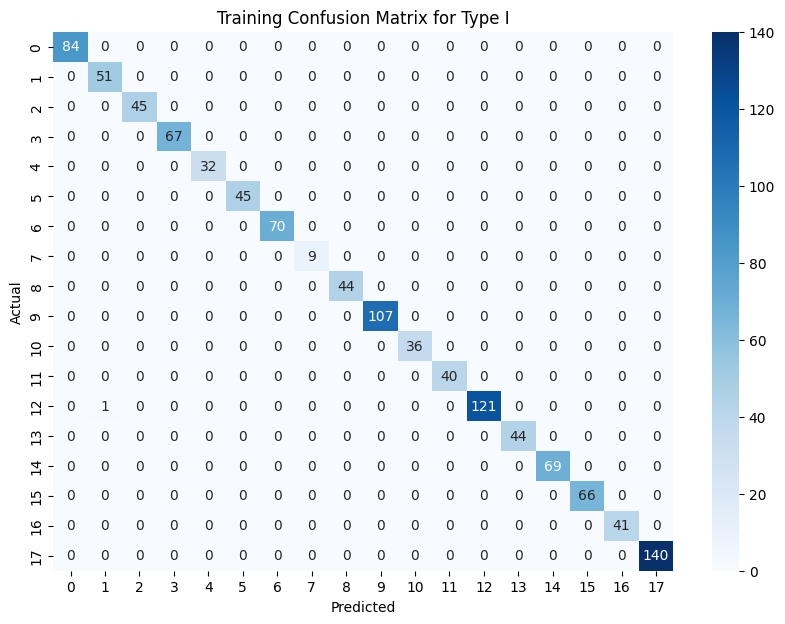

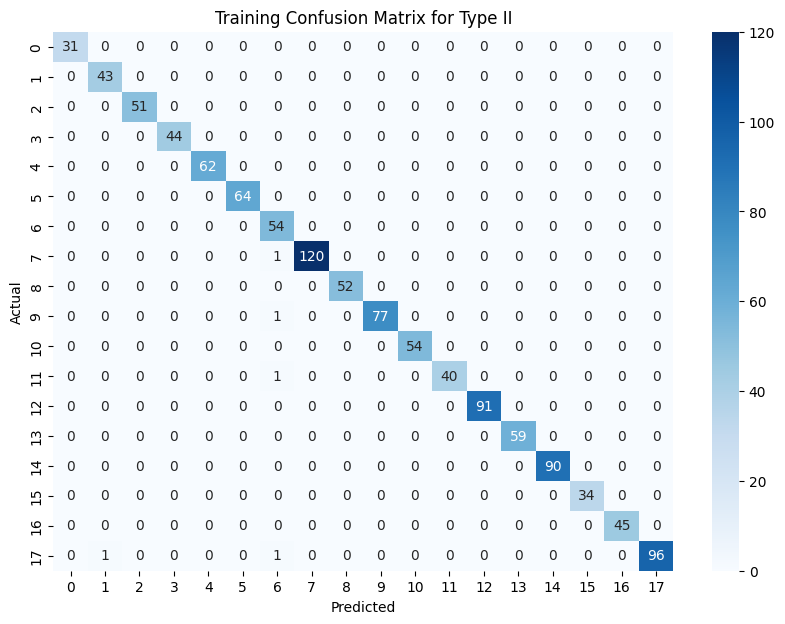

In [114]:
# Visualize the trainning results in a 2d ListedColormap plot
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=None):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    return plt

# Plot learning curve for Type I
plot_learning_curve(best_clf1, "Learning Curve for Type I", X_train, y1_train, cv=5, n_jobs=-1)
plt.show()

# Plot learning curve for Type II
plot_learning_curve(best_clf2, "Learning Curve for Type II", X_train, y2_train, cv=5, n_jobs=-1)
plt.show()

# Plot confusion matrix for Type I
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Type I')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Type II
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Type II')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Type I on the training set
conf_matrix1_train = confusion_matrix(y1_train, y1_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix for Type I')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Type II on the training set
conf_matrix2_train = confusion_matrix(y2_train, y2_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix for Type II')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()